## You can use this notebook template to check out any stock price from Yahoo Finance

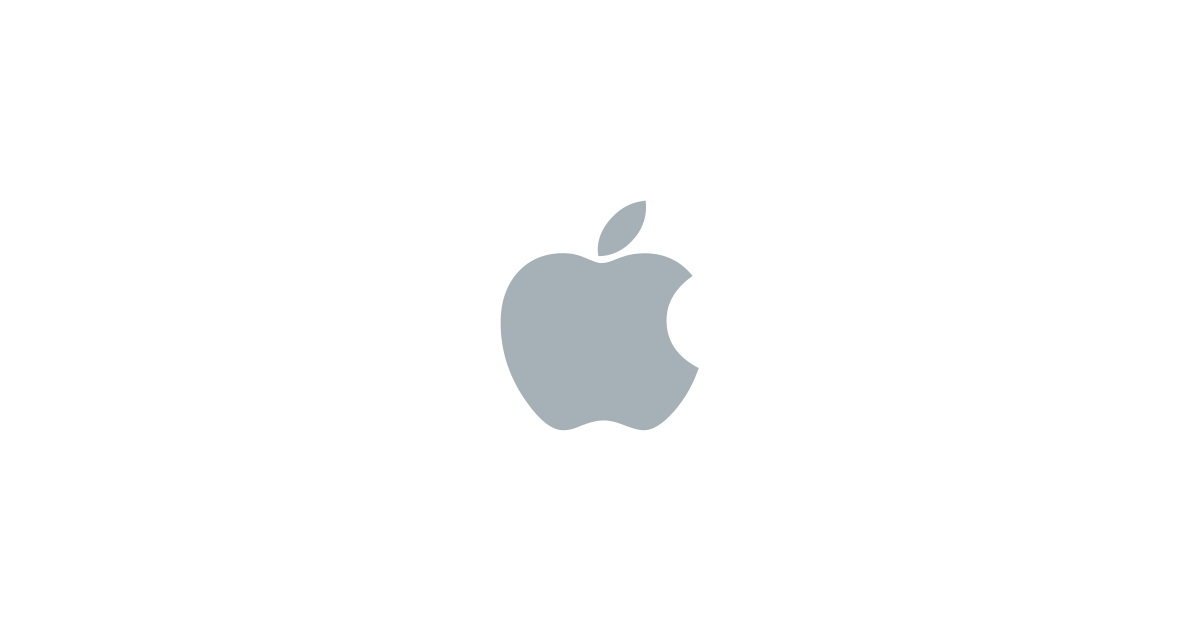

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader.data as pdr
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams["figure.figsize"] = (20,4)
from IPython.display import Image
Image("https://www.apple.com/ac/structured-data/images/open_graph_logo.png", width=1000, height=1000)

## What is stock?  

When you learn fraction, you probably learn the analogy of slicing a pizza.  

Imagine we slice up a company pie into some slices, each slice is a "share" of the company stock, and has a price that changes according its value.  

Its value is determined mostly by supply and demand: how many people want its products and how it can supply the demand.  

In practice, we cannot slice up a company, but the basic meaning is similar.  

If the company goes badly, all the slices goes badly. 

If the company gains values and becomes bigger, the slices become bigger (as long as there are not any more shares) and the prices go up.

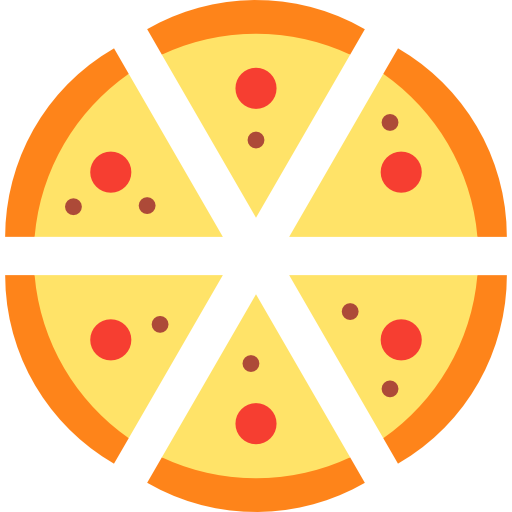

In [2]:
Image("./data/pizza.png", width=300, height=300)

## import Apple trading data from yahoo  苹果交易时间序列 
Let's call the data 

In [3]:
apple = pdr.get_data_yahoo('AAPL', start=datetime.datetime(1990, 7, 16), end=datetime.date.today())


In [4]:
#plt.style.use('fivethirtyeight')
plt.style.use('seaborn-darkgrid')

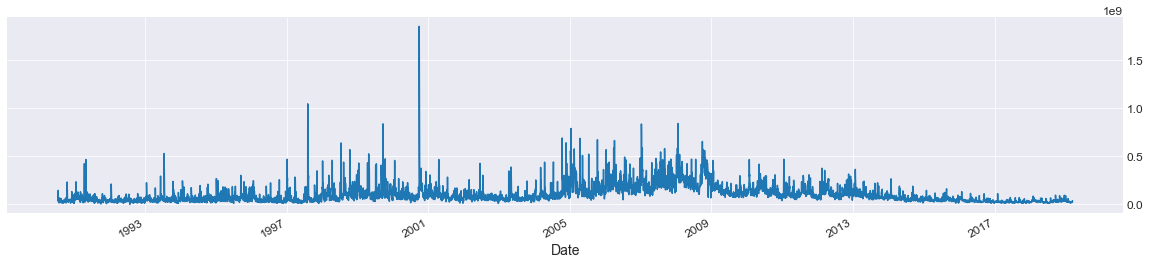

In [5]:
apple.Volume.plot(figsize=(20,4), secondary_y=True, grid=True)

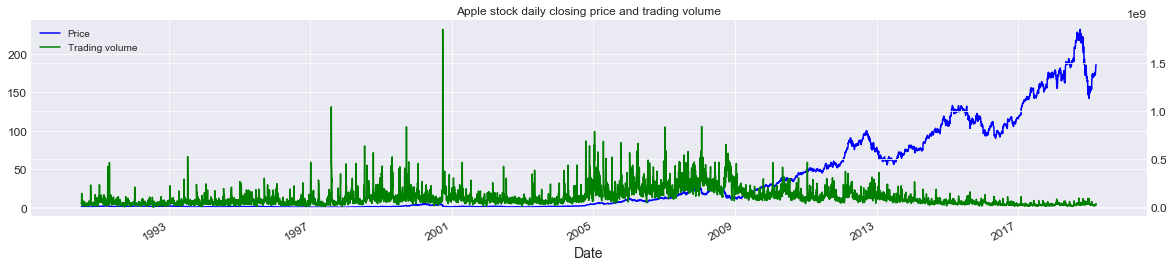

In [6]:
ax1 = apple.Close.plot(color='blue', grid=True, label='Price')
ax2 = apple.Volume.plot(color='green', grid=True, secondary_y=True, label='Trading volume')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

plt.title("Apple stock daily closing price and trading volume")
plt.legend(h1+h2, l1+l2, loc=2)

###### Note: '1e9' on the vertical axis means 1000000000, i.e. 10^9.  This is scientific notation. 

In [7]:
#beginning 5 days of the data
apple.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1990-07-16,1.683036,1.616071,1.669643,1.629464,44926000.0,0.177980
1990-07-17,1.642857,1.571429,1.633929,1.580357,34213200.0,0.172616
1990-07-18,1.607143,1.535714,1.589286,1.593750,72091600.0,0.174079
1990-07-19,1.517857,1.428571,1.455357,1.491071,146496000.0,0.162864
1990-07-20,1.517857,1.455357,1.500000,1.464286,47961200.0,0.159938


In [8]:
apple.shape

(7223, 6)

In [9]:
#Change the format to make numbers display more nicely
pd.options.display.float_format = '{:20,.1f}'.format

## Most recent prices
You should definitely check this out.

In [10]:
apple.tail(1)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-03-15,187.3,183.7,184.9,186.1,"39,024,112.0",186.1


In [11]:
apple.to_pickle('apple_03152019.pkl')

## Trading history

#### Trading volume = how much interest people have in the stock, either to buy or to sell

Text(0.5,1,'Trading volume')

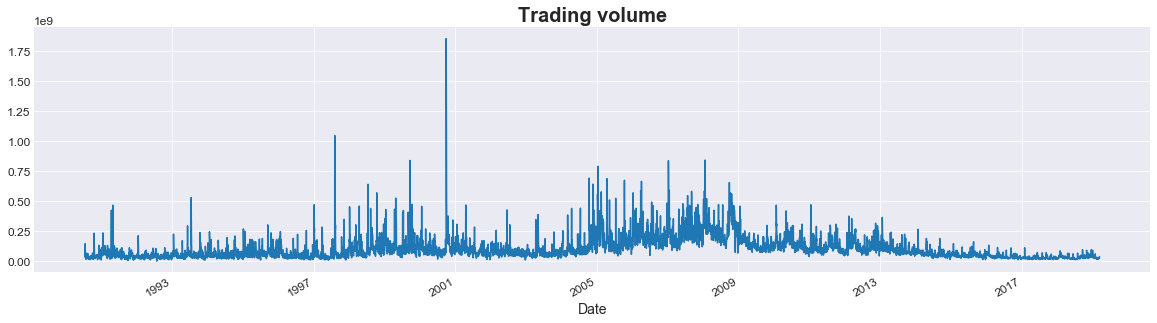

In [12]:
fig = plt.figure(figsize = (20,5))
apple.Volume.plot()
plt.title("Trading volume", fontdict={'fontsize': 20, 'fontweight': 'bold'})

#### Trading price = how much did/do people believe apple is worth

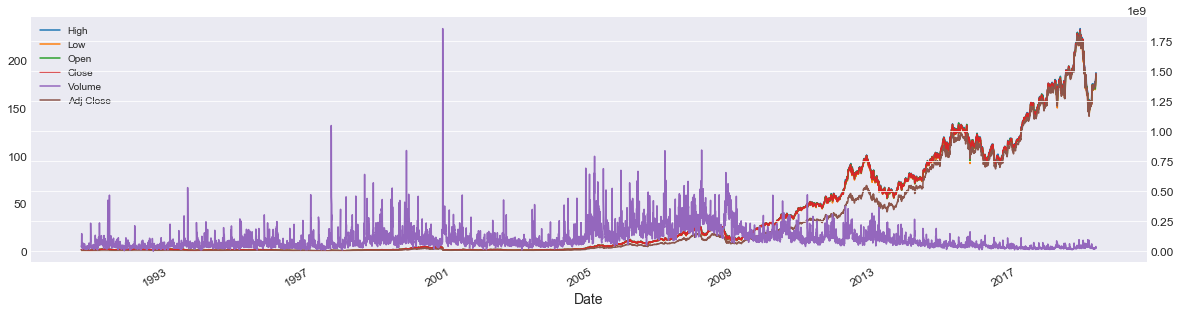

In [13]:
apple.plot(secondary_y=['Volume'], mark_right=False, figsize = (20,5))

## Irational exuberance

It is interesting to see when the maximum of trading price and volume took place.

In [14]:
apple.idxmax(axis=0, skipna=True)

High        2018-10-03
Low         2018-10-03
Open        2018-10-04
Close       2018-10-03
Volume      2000-09-29
Adj Close   2018-10-03
dtype: datetime64[ns]

In [15]:
price_max= pd.to_datetime(" 2018-10-03")
volume_max =pd.to_datetime("2000-09-29")


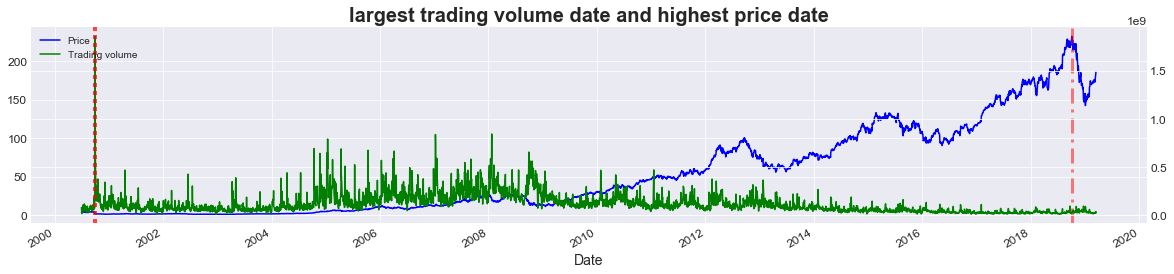

In [16]:
ax1 = apple.loc['2000-06-30':].Close.plot(color='blue', grid=True, label='Price')
ax2 = apple.loc['2000-06-30':].Volume.plot(color='green', grid=True, secondary_y=True, label='Trading volume')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

plt.title("largest trading volume date and highest price date", fontdict={'fontsize': 20, 'fontweight': 'bold'})
plt.legend(h1+h2, l1+l2, loc=2)
ax1.axvline(price_max, color ='red', alpha=0.5, dashes=(5, 2, 1, 2), linewidth=3.0)
ax2.axvline(volume_max, color ='red', alpha=0.7, dashes=(1,1), linewidth=4.0)

### another way to plot the same thing

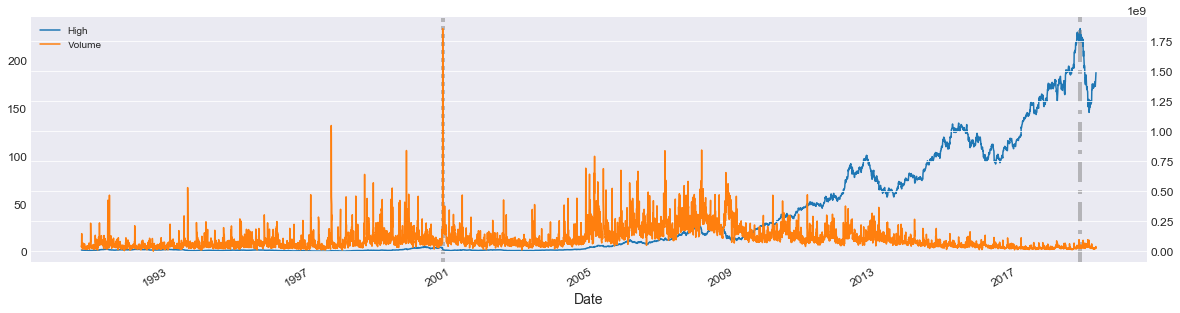

In [17]:
ax=apple[['High',"Volume"]].plot(secondary_y=['Volume'], mark_right=False, figsize=(20, 5))
ax.axvline(price_max, color ='grey', alpha=0.5, dashes=(5, 2, 1, 2), linewidth=4.0)
ax.axvline(volume_max, color ='grey', alpha=0.5, dashes=(1,1), linewidth=4.0)

## Apple price peaked in October 2018, but the trading volume by far maxed out on September 29, 2000.

Zooming in to June 30, 2000 to December 30, 2000. 

### *Price (blue line) dropped in free fall while trading volume skyrocketed*

### What happened on September 29, 2000?

From [CNN "Apple bruises tech sector" September 29, 2000: 4:33 p.m. ET](https://money.cnn.com/2000/09/29/markets/techwrap/)
 


>Computer maker's warning weighs on hardware, chip stocks; Nasdaq tumbles 


>NEW YORK (CNNfn) - Computer hardware makers bore the brunt of a sell-off in the technology sector Friday on the heels of an earnings warning from Apple Computer.
>Apple's (AAPL: Research, Estimates) market value was sliced in half Friday, its shares falling \$27.75 to end the session 51.9 percent lower at \$25.75. They were the most actively-traded on Nasdaq and were among the biggest percentage decliners as well.
>The Nasdaq composite index, which is weighed heavily with technology names, ended the session 105.92 lower at 3,672.40, a 2.8 percent decline on the day.
>After Thursday's closing bell, Apple warned that its fourth-quarter profit would fall well short of Wall Street forecasts. The company blamed lower-than-expected sales in September, with particular weakness in the education market.
>It was the latest in a raft of warnings from high-tech companies in recent weeks, including semiconductor giant Intel, which last week warned that its revenue growth in the third quarter would amount to as little as half what some on the Street had expected.

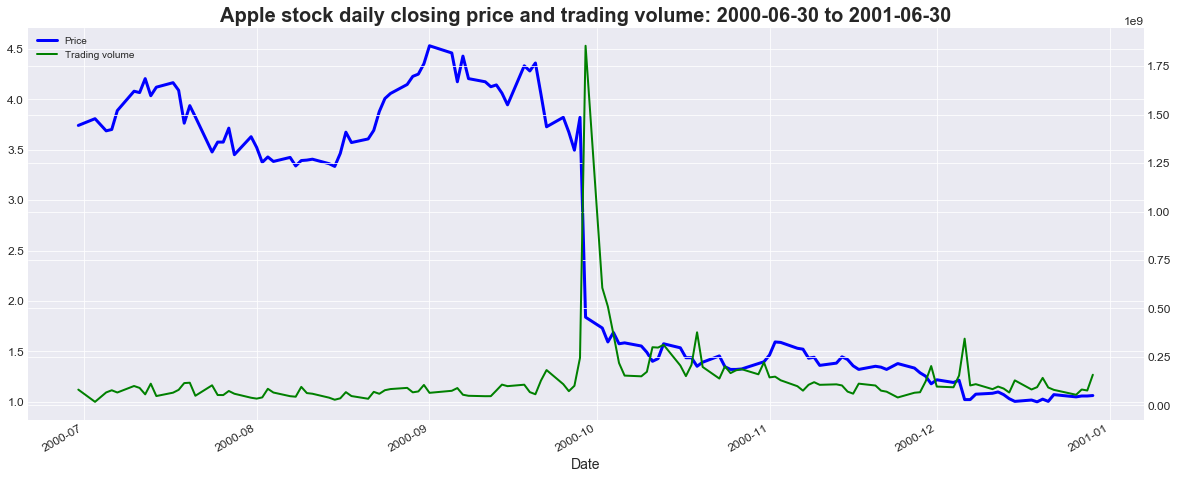

In [18]:
ax1 = apple.loc['2000-06-30':'2000-12-30'].Close.plot(color='blue', grid=True, label='Price', figsize=(20,8), linewidth=3.0)
ax2 = apple.loc['2000-06-30':'2000-12-30'].Volume.plot(color='green', grid=True, secondary_y=True, label='Trading volume',figsize=(20,8),linewidth=2.0)

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

plt.title("Apple stock daily closing price and trading volume: 2000-06-30 to 2001-06-30", fontdict={'fontsize': 20, 'fontweight': 'bold'})
plt.legend(h1+h2, l1+l2, loc=2)

### Stock split
A stock is split into more shares.
##### Wait a minute, CNN news back then in 2000 quoted Apple price sliced more than half to \$25.75.  But how come it looked like it was less than \$5 back then?
From [Apple](https://investor.apple.com/investor-relations/faq/)
> How many times has Apple's stock split?
> Apple’s stock has split four times since the company went public. The stock split on a 7-for-1 basis on June 9, 2014 and split on a 2-for-1 basis on February 28, 2005, June 21, 2000, and June 16, 1987.

## Average monthly trading data

Text(0.5,1,'average monthly trading data')

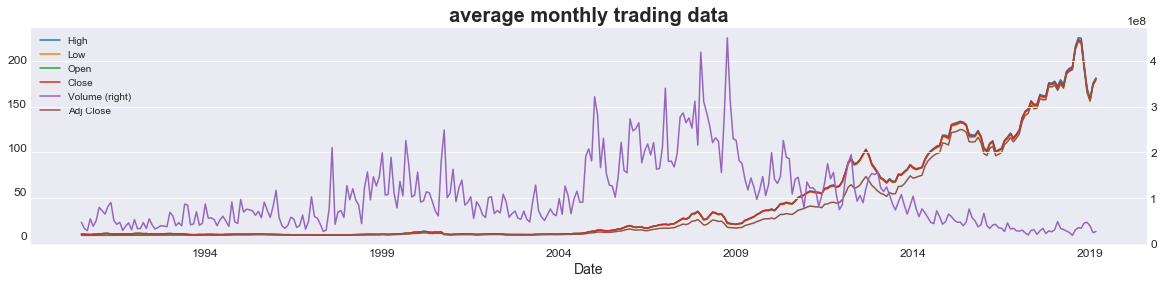

In [19]:
apple.resample('M').mean().plot(secondary_y="Volume")
plt.title("average monthly trading data", fontdict={'fontsize': 20, 'fontweight': 'bold'})

Text(0.5,1,'average monthly closing prices')

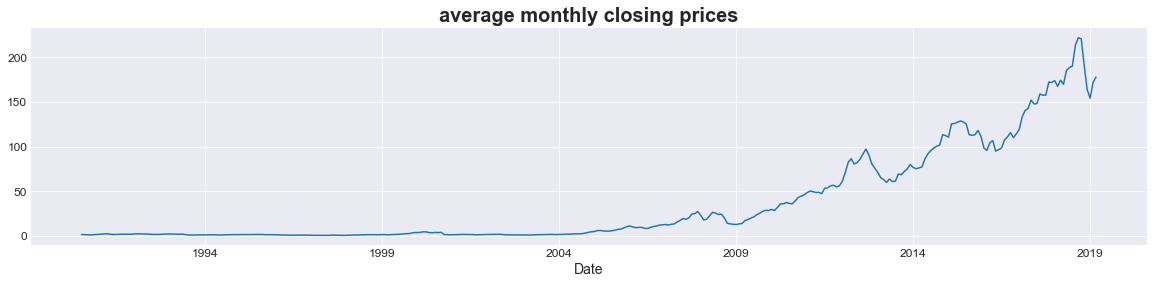

In [20]:
price = apple.Close
price.resample('M').mean().plot()
plt.title("average monthly closing prices", fontdict={'fontsize': 20, 'fontweight': 'bold'})

## Moving average

Moving average is to take average by longer periods of time at each time point. 
The result will be a much smoother line. The longer periods of time, the smoother the line is. 
This is because we are averaging numbers. 

In [21]:
apple.drop('Adj Close',axis=1, inplace=True)

In [22]:
moving = apple.rolling(30, center = True).mean()
moving.columns=['High_ma','Low_ma','Open_ma','Close_ma','Volume_ma']
moving.shape

(7223, 5)

In [23]:
ma=pd.concat((moving, apple), axis=1)

Text(0.5,1,'30-day center moving average closing price and original closing price')

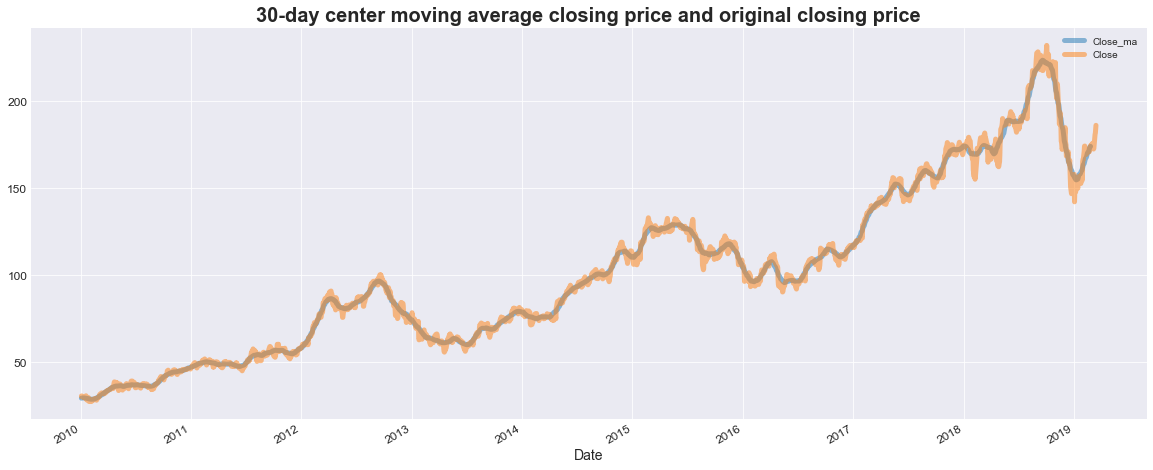

In [26]:
ma.loc['2010':,['Close_ma','Close']].plot(figsize=(20,8), linewidth=5, alpha=0.5)
plt.title("30-day center moving average closing price and original closing price", fontdict={'fontsize': 20, 'fontweight': 'bold'})